sources :
1. https://www.kaggle.com/code/mohamedbakrey/eda-for-microsoft-stock-data-using-ml-algo-acc100
2. https://www.kaggle.com/code/leokaka/pca-for-time-series-analysis
3. https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4
4. https://medium.com/intel-analytics-software/clustering-time-series-with-pca-and-dbscan-f9f98851f8ec

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
file_path = "MSFT.csv"  # Adjust filename as needed
data = pd.read_csv(file_path)

# Display initial information
print("Initial Data Info:")
print(data.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9008 non-null   object 
 1   Open       9008 non-null   float64
 2   High       9008 non-null   float64
 3   Low        9008 non-null   float64
 4   Close      9008 non-null   float64
 5   Adj Close  9008 non-null   float64
 6   Volume     9008 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 492.8+ KB
None


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400


In [4]:
# Clean data: Drop rows with missing values and ensure proper date format
data = data.dropna()
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')

# Display summary statistics after cleaning
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  9008.000000  9008.000000  9008.000000  9008.000000  9008.000000   
mean     39.100634    39.509320    38.688871    39.113846    34.052517   
std      54.693955    55.194788    54.185887    54.725668    54.945451   
min       0.088542     0.092014     0.088542     0.090278     0.056994   
25%       3.958985     4.007813     3.935547     3.960938     2.500626   
50%      26.750000    27.030001    26.469999    26.745000    18.841834   
75%      39.113751    39.783438    38.502499    39.115313    28.682776   
max     344.619995   349.670013   342.200012   343.109985   343.109985   

             Volume  
count  9.008000e+03  
mean   5.893725e+07  
std    3.853809e+07  
min    2.304000e+06  
25%    3.481388e+07  
50%    5.222880e+07  
75%    7.281968e+07  
max    1.031789e+09  


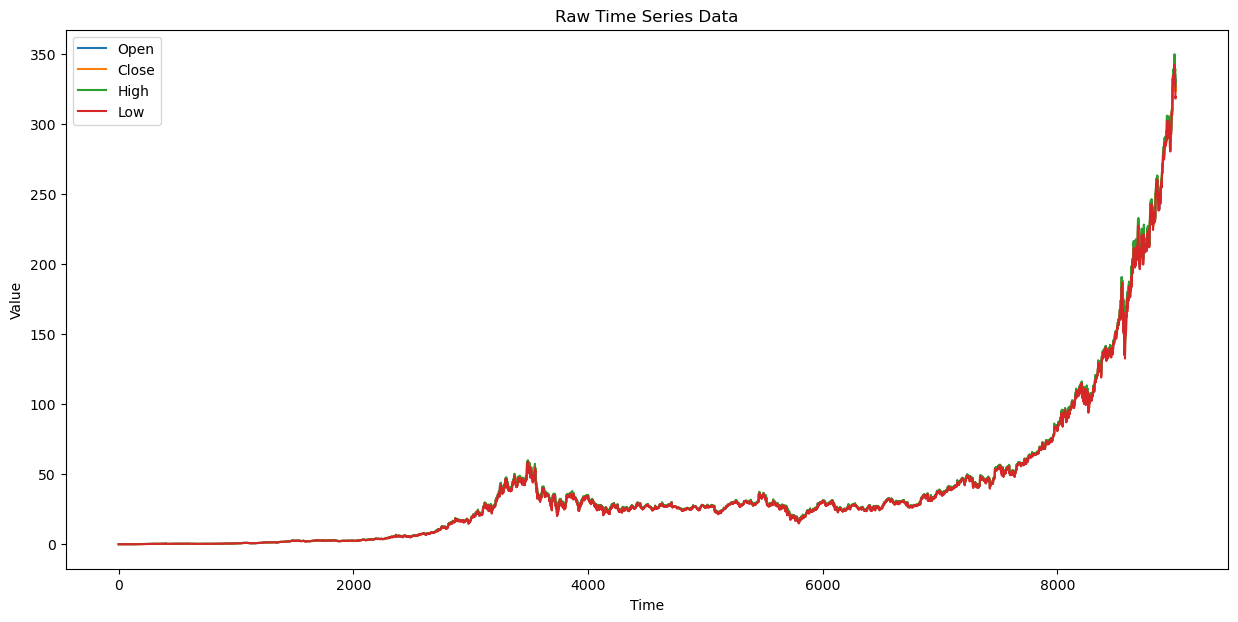

In [7]:
# Visualize raw data
plt.figure(figsize=(15, 7))
plt.title("Raw Time Series Data")
plt.plot(data['Open'], label='Open')
plt.plot(data['Close'], label='Close')
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [8]:
# Basic EDA
print("Basic EDA:")
print("Missing Values:")
print(data.isnull().sum())

Basic EDA:
Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Select only numeric columns for PCA (exclude non-numeric data)
numeric_data = data.select_dtypes(include=[np.number])

# Standardize the numeric data only
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [11]:
# Apply PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(data_scaled)

In [12]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_embeddings, columns=['PC1', 'PC2'])

In [13]:
pca_df.head()

,PC1,PC2
0,-5.709373,24.639697
1,-2.601282,6.120843
2,-1.849641,1.642597
3,-1.568770,-0.031228
4,-1.483501,-0.539799


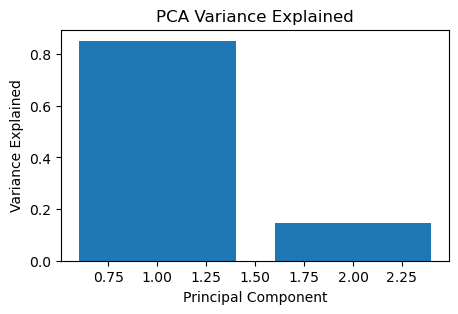

In [16]:
# Variance explained plot
plt.figure(figsize=(5, 3))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')
plt.show()

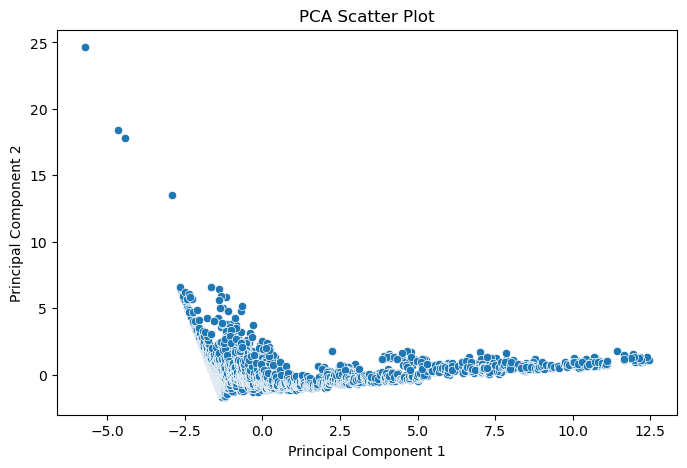

In [19]:
# Scatter plot of PCA results
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()